We have based our program on this page:
http://neurdon.wpengine.com/2011/02/02/neural-modeling-with-python-part-3/

# Izhikevich spiking neuron model

In [1]:
#If you dont have brian2 library, uncomment this line
#!pip install brian2

    100% |################################| 1.7MB 224kB/s eta 0:00:01  9% |##                              | 153kB 2.5MB/s eta 0:00:01    63% |####################            | 1.1MB 10.5MB/s eta 0:00:01
    100% |################################| 81kB 2.7MB/s eta 0:00:01
  Running setup.py bdist_wheel for brian2 ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ done
  Stored in directory: /home/nbuser/.cache/pip/wheels/bd/f1/b4/cd2fa2e4cb808f22db4d94ee0c9b694c3f14f45c274e7b5643
  Running setup.py bdist_wheel for py-cpuinfo ... - \ | / done
  Stored in directory: /home/nbuser/.cache/pip/wheels/a0/7a/be/03a05b26f48a7c49fdce56f34fdde3c3043feed6ed84afde3c
Successfully built brian2 py-cpuinfo


In [2]:
from brian2 import *
import matplotlib.pyplot as plt

/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Here, we define our Izhikevich model. It has two different differencial equations in which the model is based on. We have created a single neuron which learns to solve the equations with the values that we give it.

In [3]:
def izh_model(a = 0.02, b = 0.25, c = -50, d = 2, I = 15, v0 = -70, time = 220):
    #Initialize a brian2 space, resetting all the variables
    start_scope()

    # Izhikevich neuron parameters.  
    a = a/ms
    b = b/ms
    c = c*mV
    d = d*mV/ms
    I = I*mV/ms

    # Standard Izhikevich neuron equations.  
    eqs = '''
    dv/dt = 0.04*v**2/(ms*mV) + (5/ms)*v + 140*mV/ms - u + I : volt
    du/dt = a*((b*v) - u) : volt/second
    '''

    reset = '''
    v = c
    u += d
    '''

    # Create a Neuron with the values from the Izhikevich paper
    G = NeuronGroup(1, eqs, threshold='v>30*mV', reset=reset, method='euler')
    
    #Initialization and update values
    G.v = v0*mV
    G.u = b*G.v
    
    M = StateMonitor(G, 'v', record=True)
    spikemon = SpikeMonitor(G)
    run(time*ms)

    # Plot results.  
    plt.figure(figsize=(5,2))
    plt.plot(M.t/ms, M.v[0], c='g')
    for t in spikemon.t:
        plt.axvline(t/ms, c='k', lw=.3)
    plt.xlabel('Time (ms)')
    plt.ylabel('mv')
    plt.show()

# Types of dynamics

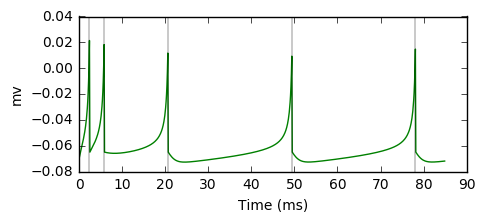

In [6]:
# RS (regular spiking)
izh_model(a=0.018, b=0.01, c=-65, d=8, v0=-70, I=30, time=85)

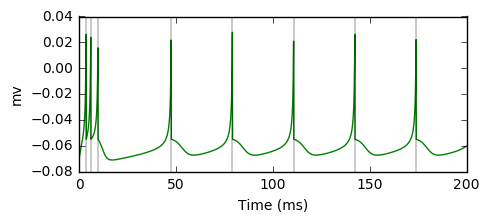

In [26]:
# IB (intrinsically  bursting)
izh_model(a=0.02, b=0.2, c=-55, d=4, v0=-70, I=10, time=200)

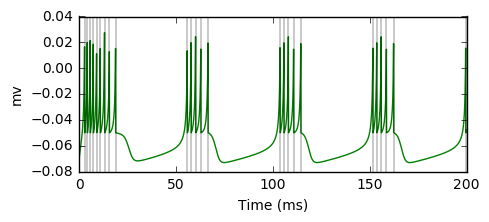

In [27]:
# CH (chattering)
izh_model(a=0.02, b=0.25, c=-50, d=2, v0=-70, I=10, time=200)

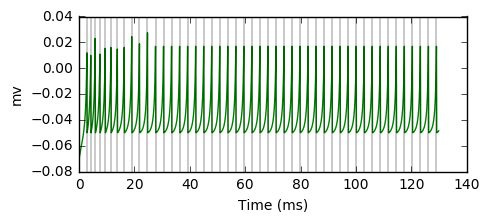

In [28]:
# FS (fast spiking)
izh_model(a=0.1, b=0.25, c=-50, d=2, v0=-70, I=10, time=130)

# Features

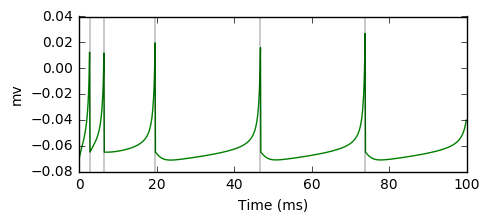

In [29]:
# Tonic spiking
izh_model(a=0.02, b=0.2, c=-65, d=6, v0=-70, I=14, time=100)

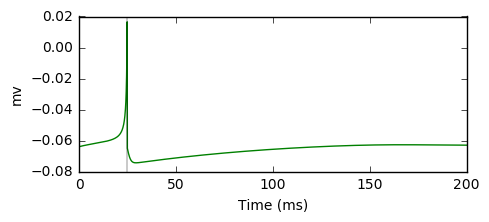

In [34]:
# Phasic spiking
izh_model(a=0.02, b=0.25, c=-65, d=6, v0=-64, I=0.5, time=200)

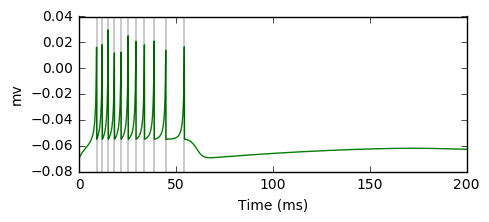

In [31]:
# Phasic bursting
izh_model(a=0.02, b=0.25, c=-55, d=0.05, v0=-70, I=0.6, time=200)

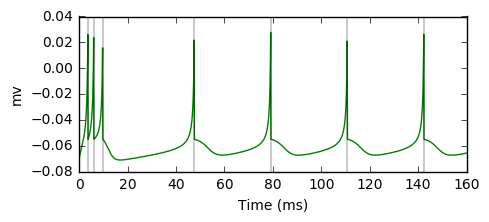

In [32]:
# Mixed model
izh_model(a=0.02, b=0.2, c=-55, d=4, v0=-70, I=10, time=160)

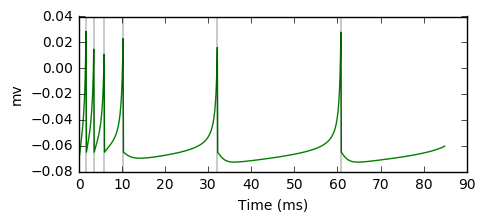

In [33]:
# Spike frequency adaptation
izh_model(a=0.01, b=0.2, c=-65, d=8, v0=-70, I=30, time=85)